In [20]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
file_one = "Resources\Data1.csv"
file_two = "Resources\Data2.csv"

In [3]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [4]:
#Combining two Data frames
file_one_df["DATE"]=file_two_df["DATE"]
file_one_df.head()


,Temperature,Revenue,DATE
0,24.566884,534.799028,01/01/1972
1,26.005191,625.190122,01/02/1972
2,27.790554,660.632289,01/03/1972
3,20.595335,487.706960,01/04/1972
4,11.503498,316.240194,01/05/1972


In [5]:
file_one_df["value"]=file_two_df["value"]
file_one_df.head()

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [6]:
data=file_one_df

In [7]:
#Renaming Columns
final_data=data.rename(columns={"DATE": "Date", "value": "Consumption"})

In [8]:
final_data.head()

,Temperature,Revenue,Date,Consumption
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [9]:
min_rev=data['Revenue'].min()
min_rev

10.0

In [10]:
max_rev=data['Revenue'].max()
max_rev

1000.0

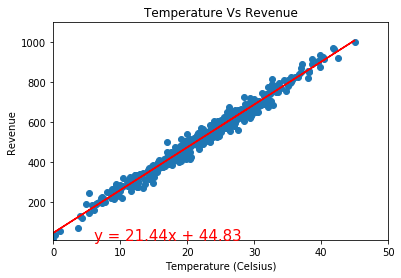

In [11]:
# Add the linear regression equation and line to plot fot Temperature and Revenue
x_axis=final_data.Temperature
y_axis=final_data.Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Revenue")
plt.title("Temperature Vs Revenue")
plt.xlim(0,50)
plt.ylim(10,1100)
plt.show()

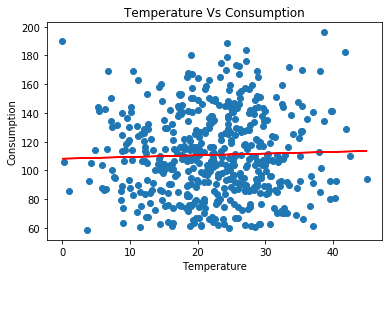

In [12]:
# Add the linear regression equation and line to plot fot Temperature and Consumption
x_axis=final_data.Temperature
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature")
plt.ylabel("Consumption")
plt.title("Temperature Vs Consumption")
plt.show()

Random Forest Classifier
------------------------------------------

In [13]:
# data preview
final_data.head(10)

,Temperature,Revenue,Date,Consumption
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636
5,14.352514,367.940744,01/06/1972,100.5960
6,13.707780,308.894518,01/07/1972,100.1263
7,30.833985,696.716640,01/08/1972,96.3607
8,0.976870,55.390338,01/09/1972,85.8007
9,31.669465,737.800824,01/10/1972,70.3934


In [14]:
# Assigning X and y values
X = final_data['Temperature'].values
y = final_data['Revenue'].values

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [16]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\shweta shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [17]:
# Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([820.55456438, 631.6760879 , 757.61288558, 617.1554259 ,
       583.84375211, 565.20108683, 607.61058205, 524.17491946,
       308.016448  , 682.62136561, 610.43224727, 304.0170953 ,
       619.9463984 , 303.07630686, 502.69397016, 407.77216663,
       377.6914835 , 272.66939042, 835.50985254, 667.36146745,
       606.93538805, 425.17123132, 710.55589184, 515.5856537 ,
       560.46821645, 778.77692984, 756.01577176, 678.1579556 ,
       588.53060553, 341.0344219 , 561.9422064 , 458.16146621,
       411.17983321, 809.70375515, 475.90246038, 189.80845105,
        40.20299697, 448.30320327, 710.55589184, 546.62879192,
       387.77133881, 549.21298244, 508.87007232, 535.39717898,
       466.45835303, 510.34971486, 835.50985254, 672.45033657,
       617.75724152, 648.77266976, 538.86668154, 541.6468618 ,
       313.50448366, 699.36242616, 363.57109402, 501.1062765 ,
       701.06490887, 579.67201444, 507.09912457, 612.19380964,
       835.50985254, 533.8453764 , 465.56895403, 313.38

In [18]:
# Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,809.463411,820.554564
1,654.894955,631.676088
2,774.108081,757.612886
3,612.243721,617.155426
4,572.537048,583.843752
...,...,...
245,534.799028,598.314001
246,250.131728,228.486636
247,623.598861,615.323737
248,756.962562,809.501468


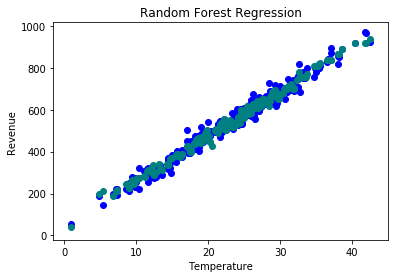

In [21]:
# Visualising the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'teal')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

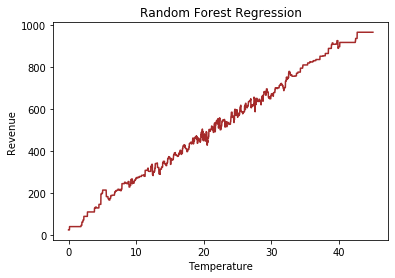

In [22]:
# Visualising the Random Forest Regression Results
plt.plot(X_grid, regressor.predict(X_grid), color = 'brown')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [23]:
# Predicting revenue at a given temperature
T = 20
Revenue = regressor.predict([[T]])
Revenue

array([472.67603533])